In [1]:
from scipy.signal import butter, sosfilt, sosfreqz
import wfdb
import pickle
import os

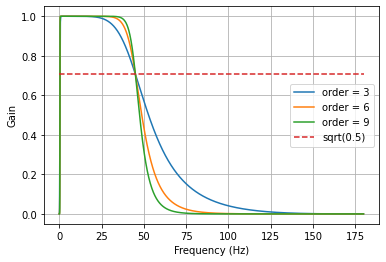

In [2]:
def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y


import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 360.0
lowcut = 0.4
highcut = 45.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = sosfreqz(sos, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

In [59]:
files = [x[:x.find(".")] for x in os.listdir("../data/files/mitdb/1.0.0") if x.endswith(".dat")]

In [60]:
data = [] 

for file in files:
    #print(file)
    record = wfdb.io.rdrecord("../data/files/mitdb/1.0.0/%s" %file)
    annotation = wfdb.io.rdann("../data/files/mitdb/1.0.0/%s" %file, extension = "atr")
    listy = list(zip(annotation.symbol, annotation.sample))
    #wfdb.plot_items(record.p_signal[:1000])
    y = butter_bandpass_filter(record.p_signal, lowcut, highcut, fs, order=5)
    #wfdb.plot_items(y)
    data.append((y, listy))
    
with open("prepro.data", "wb") as out:
        pickle.dump(data, out) 
data

[(array([[-3.15984175e-05, -2.17950029e-03],
         [-3.15984175e-05, -2.17950029e-03],
         [-3.15984175e-05, -2.17950029e-03],
         ...,
         [ 3.58642039e-03,  2.21002647e-02],
         [ 2.25928685e-03,  1.26381421e-02],
         [ 4.04459744e-03,  2.61886968e-02]]),
  [('+', 18),
   ('N', 95),
   ('N', 253),
   ('N', 478),
   ('N', 673),
   ('N', 873),
   ('N', 1076),
   ('N', 1272),
   ('N', 1466),
   ('N', 1655),
   ('N', 1849),
   ('N', 2047),
   ('N', 2236),
   ('N', 2433),
   ('N', 2632),
   ('N', 2832),
   ('N', 3021),
   ('N', 3219),
   ('N', 3408),
   ('N', 3603),
   ('N', 3806),
   ('N', 4007),
   ('N', 4200),
   ('N', 4401),
   ('N', 4592),
   ('N', 4785),
   ('N', 4976),
   ('N', 5172),
   ('N', 5374),
   ('N', 5571),
   ('N', 5771),
   ('N', 5963),
   ('N', 6156),
   ('N', 6347),
   ('N', 6543),
   ('N', 6742),
   ('N', 6941),
   ('N', 7134),
   ('N', 7333),
   ('N', 7522),
   ('N', 7715),
   ('N', 7914),
   ('N', 8107),
   ('N', 8302),
   ('N', 8497),
  

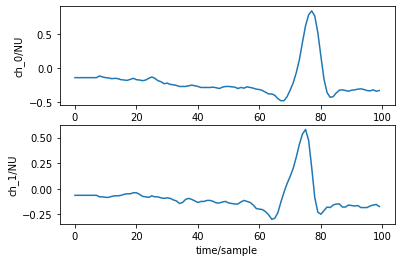

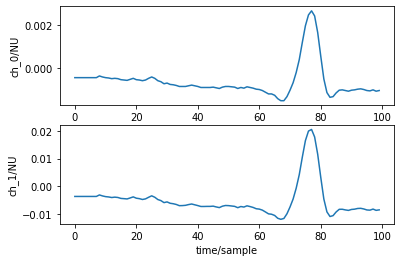

In [14]:
# Filter a noisy signal.
record = wfdb.io.rdrecord("../data/files/mitdb/1.0.0/100")
annotation = wfdb.io.rdann("../data/files/mitdb/1.0.0/100", extension = "atr")
wfdb.plot_items(record.p_signal[:100])
y = butter_bandpass_filter(record.p_signal[:100], lowcut, highcut, fs, order=5)
wfdb.plot_items(y)
    

In [56]:
list(zip(annotation.symbol, annotation.sample))

[('+', 18),
 ('N', 77),
 ('N', 370),
 ('N', 662),
 ('N', 946),
 ('N', 1231),
 ('N', 1515),
 ('N', 1809),
 ('A', 2044),
 ('N', 2402),
 ('N', 2706),
 ('N', 2998),
 ('N', 3282),
 ('N', 3560),
 ('N', 3862),
 ('N', 4170),
 ('N', 4466),
 ('N', 4764),
 ('N', 5060),
 ('N', 5346),
 ('N', 5633),
 ('N', 5918),
 ('N', 6214),
 ('N', 6527),
 ('N', 6823),
 ('N', 7106),
 ('N', 7391),
 ('N', 7670),
 ('N', 7953),
 ('N', 8245),
 ('N', 8539),
 ('N', 8837),
 ('N', 9141),
 ('N', 9431),
 ('N', 9710),
 ('N', 9998),
 ('N', 10282),
 ('N', 10591),
 ('N', 10894),
 ('N', 11191),
 ('N', 11480),
 ('N', 11781),
 ('N', 12066),
 ('N', 12350),
 ('N', 12645),
 ('N', 12949),
 ('N', 13266),
 ('N', 13562),
 ('N', 13842),
 ('N', 14131),
 ('N', 14423),
 ('N', 14710),
 ('N', 15011),
 ('N', 15310),
 ('N', 15607),
 ('N', 15899),
 ('N', 16183),
 ('N', 16464),
 ('N', 16755),
 ('N', 17058),
 ('N', 17358),
 ('N', 17657),
 ('N', 17947),
 ('N', 18227),
 ('N', 18514),
 ('N', 18795),
 ('N', 19080),
 ('N', 19388),
 ('N', 19693),
 ('N', 1

In [44]:
annotation.symbol.index("V")

1907

In [53]:
x = annotation.sample[1907]

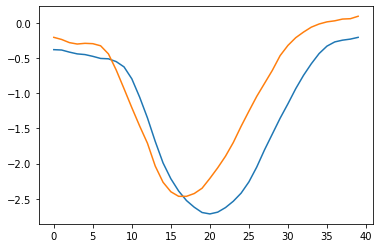

In [54]:
plt.plot(record.p_signal[x-20:x+20])

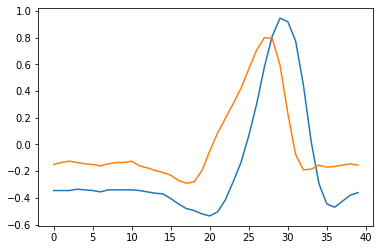

In [39]:
plt.plot(record.p_signal[1780:1820])

In [6]:
y[0]

array([-0.00045818, -0.00363026])